## Automated ML

<center>
<figure>
<img align=center src="fig/auto-ML.jpeg" width="800" >
</figure>
</center>

## ML meta-challenges

- Increasing model complexity
    - More flexible models have more parameters
- More sophisticated fitting procedures
    - Non-convex optimization has many knobs to turn
- Less accessible to Non-experts
    - Harder to apply complicates techniques
- Results are less reproducible
    - Too many important implementation details are missing

## Hyperparameters tuning

- Hyperparameters
    - Folk definition: any parameter "left over" that isn't apparent how to optimize during training
- ML algorithms' performance is **highly sensitive to hyper-parameters**
- E.g. Neural nets involve **numerous** decisions to make
    - Architectural hyperparameters
<center>
<figure>
<img align=center src="fig/NN.png" width="800" >
</figure>
</center>
    - Optimization: optimizer, learning rate initialization & schedule, batch size, etc.
    - Regularization: dropout rate, weight decay, data argument, etc.

## Search for good hyperparameters

- Define an objective function 
    - Most often, we care about generalization performance
    - Use cross validation to measure parameter quality
- Traditional methods: black magic
    - Grid search
    - Random search
    - Grad student descent (a cheesy pun referring to the well-known gradient descent)

## Grid search and random search

<center>
<figure>
<img align=center src="fig/Grid-Random.png" width="800" >
</figure>
</center>

- Random search typically outperforms grid search 
    - Only a few hyperparameters really matter 
    - Finding the optimal values for the dominant hyperparameters is far more important 
    - No way of knowing which hyperparameters matter most (no free lunch)
    - Grid search suffers from the curse of dimensionality

## But ...

- Still miss optima given the computational budget

<center>
<figure>
<img align=center src="fig/heatmap.jpeg" width="800" >
</figure>
</center>

## Costly and painful ...

E.g. Alloy development
- Goal: Find the best composition for the highest strength
- Alloy composition: $\big[\%\text{Al}, \%\text{Co}, \%\text{Fe}, \%\text{Cu}, \%\text{C}\big]$
- Strength: $y$

<center>
<figure>
<img align=center src="fig/periodic-table.jpg" width="400" >
</figure>
</center>

- Trial-error approach is typically used for alloy development using expert knowledge
    - 1 alloy testing = 1 day and \$100
    - 100 experiments = 3 months and \$10,000
    - Even with 100 experiments, trial-error still can not get the optimum solution

<center>
<figure>
<img align=center src="fig/trial-and-error.jpg" width="400" >
</figure>
</center>

## Problem setup

<center>
<figure>
<img align=center src="fig/black-box.png" width="500" >
</figure>
</center>

- Optimize the expensive derivative-free black-box function $f: \mathcal{X} \sim \mathbb{R}^d \rightarrow \mathbb{R}$
    - No closed form
    - Gradients are not available
    - Very expensive to evaluate (time, economic cost, etc)
    - Usually non-convex with multiple local optima
    - Know nothing about the function but only a few evaluations $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_T$ 
    - Evaluations may be noisy
    
- The set of challenges make optimization algorithms like L-BFGS-B failed
- Typical application: Hyperparameter optimization (HPO)
    - $\mathbf{x}$: Meta-parameters (learning rate, hidden units, hidden layers, etc.)
    - $\mathcal{f}$: Generalization performance (accuracy, etc.)

- Black-box functions
    - Pre-clinical drug discovery
    - Optimal policy in autonomous driving
    - Synthetic gene design

<table> <tr>
    <td> <img src="fig/eg-1.jpg" alt="Drawing" style="height: 250px;"/> </td>
    <td> <img src="fig/eg-2.jpg" alt="Drawing" style="height: 250px;"/> </td>
    <td> <img src="fig/eg-3.jpg" alt="Drawing" style="height: 250px;"/> </td>
</tr></table>

## Bayesian optimization

- Attempt to find the **global optima** in a few iteration
$$
\begin{aligned}
\mathbf{x}_* = \arg \min _{\mathbf{x} \in \mathcal{X}} f(\mathbf{x})
\end{aligned}
$$

<center>
<figure>
<img align=center src="fig/optimizer.png" width="500" >
</figure>
</center>

- Two primary components
    - **A surrogate model:** approximating the objective function (a probabilistic belief)
        - **Gaussian process (GP) regression**
        - Random forest
        - Support vector regression
        - Student-t process
        - Deep neural network
        - Bayesian neural network
        - ...
    - **An acquisition function:** deciding where to sample
        - Expected improvement
        - Upper confidence bound (UCB)
        - Thompson sampling (TS)
        - Knowledge gradient
        - Entropy search
        - ...

- Incorporate prior belief about $f$ and update the prior with samples drawn from $f$ to get a posterior that better approximates $f$
- With no observations

<center>
<figure>
<img align=center src="fig/no-obs.png" width="500" >
</figure>
</center>

- Prior $\mathcal{GP}$

<center>
<figure>
<img align=center src="fig/prior-gp.png" width="500" >
</figure>
</center>

- Observations

<center>
<figure>
<img align=center src="fig/obs.png" width="500" >
</figure>
</center>

- Posterior $\mathcal{GP}$ given observations

<center>
<figure>
<img align=center src="fig/posterior-gp.png" width="500" >
</figure>
</center>

## Algorithm 

- A sequential search framework that incorporates both exploration and exploitation

<center>
<figure>
<img align=center src="fig/algo.png" width="800" >
</figure>
</center>

## Why Bayesian?

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

<center>
<figure>
<img align=center src="fig/bayesian-statistics.png" width="300" >
</figure>
</center>

- $P(A)$: Surrogate model (prior belief)
- $P(B|A)$: New data (evidence)
- $P(A|B)$: Updated surrogate model given new data (posterior belief)

## Illustration
    
<center>
<figure>
<img align=center src="fig/illustration.png" width="400" >
</figure>
</center>

- Top panel
    - Circles: Noise-free observations of the objective function $f$
    - Solid line: A point estimate $\mu_n(x)$
        - Interpolate the evaluated points
    - Shaded part: A 95% Bayesian credible interval (confidence interval) $\mu_n(x) \pm 1.96 \times \sigma_n(x)$
        - 0 width at the evaluated points 
        - Growing wider as moving away from the evaluated points 

- Bottom panel
    - Expected improvement acquisition function corresponding to the posterior 
    - 0 value at evaluated points
        - Provide no useful information
    - Larger values for points with larger credible intervals
        - Exploration: Useful to observe points more uncertain about the objective in finding good approximate global optima
    - Larger values for points with larger posterior means
        - Exploitation: Near good approximate global mean

## Gaussian process

- A distribution over functions such that any infinite collection of evaluations at $\mathbf{x}_{1:n}$ are normally distributed
    - Input space: $\mathcal{X}$
    - Model scalar function: $f: \mathcal{X} \rightarrow \mathbb{R}$
    - Mean function: $m: \mathcal{X} \rightarrow \mathbb{R}$
    - PSD covariance function: $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$
    
$$
\begin{aligned}
   f\left(\mathbf{x}\right) & \sim \mathcal{GP}\left(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}^{\prime})\right) \\
   m(\mathbf{x}) &=\mathbb{E}[f(\mathbf{x})] \\
   k(\mathbf{x}, \mathbf{x}^{\prime}) &=\mathbb{E}\left[(f(\mathbf{x})-m(\mathbf{x}))(f(\mathbf{x}^{\prime}) - m(\mathbf{x}^{\prime}))\right]
\end{aligned}
$$

- Generalization from one dimension to infinite dimension
$$
\begin{aligned}
   x & \sim \mathcal{N}(\mu, \sigma^2) \\
   \mathbf{x} & \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})
\end{aligned}
$$

## Bayesian linear regression

- A Gaussian process

$$
\begin{aligned}
    f(\mathbf{x}) = \phi(\mathbf{x})^{\top} \mathbf{w}
\end{aligned}
$$

- Prior

$$
\begin{aligned}
    \mathbf{w} \sim \mathcal{N}(\mu, \Sigma_p)
\end{aligned}
$$

- Mean function

$$
\begin{aligned}
\mathbb{E}[f(\mathbf{x})] =\phi(\mathbf{x})^{\top} \mathbb{E}[\mathbf{w}]
\end{aligned}
$$

- Covariance function

$$
\begin{aligned}
\mathbb{E}\left[f(\mathbf{x}) f\left(\mathbf{x}^{\prime}\right)\right] &=\phi(\mathbf{x})^{\top} \mathbb{E}\left[\mathbf{w} \mathbf{w}^{\top}\right] \phi\left(\mathbf{x}^{\prime}\right)=\phi(\mathbf{x})^{\top} \Sigma_{p} \phi\left(\mathbf{x}^{\prime}\right) 
\end{aligned}
$$

## Function space view

- Given data

$$
\begin{aligned}
\big\{\left(\mathbf{x}_{i}, y_{i}\right) \big \vert i = 1, \ldots, N\big\}
\end{aligned}
$$

- Additive **independent** identically distributed Gaussian noise with variance $\sigma_{n}^{2}$

$$
\begin{aligned}
y = f(x) + \varepsilon \\
\varepsilon \sim \mathcal{N}(0, \sigma_{n}^{2})
\end{aligned}
$$

- Suppose

$$
\begin{aligned}
X &= \left(\mathbf{x}_{1}, \mathbf{x}_{2}, \ldots, \mathbf{x}_{N}\right)^{\top} \\
Y &= \left(y_{1}, y_{2}, \ldots, y_{N}\right)^{\top}
\end{aligned}
$$

- Thus

$$
\begin{aligned}
f(X) & \sim N(\mu(X), K(X, X)) \\
Y = f(X) + \varepsilon & \sim N\left(\mu(X), K(X, X)+\sigma_{n}^{2} I\right)
\end{aligned}
$$

- Given noisy observations at $N$ points thereof

$$
\begin{aligned}
    \mathbf{y} = \big[ f(\mathbf{x}_1)+\sigma_{1}^{2}, f(\mathbf{x}_2)+\sigma_{2}^{2},  \ldots, f(\mathbf{x}_N)+\sigma_{n}^{2}\big]^{\top}
\end{aligned}
$$

- Make predictions about the function value at new points  $\left(\mathbf{x}_*^1, \mathbf{x}_*^2, \ldots, \mathbf{x}_*^M\right)^{\top}$

$$
\begin{aligned}
    \mathbf{f}_* = \big[ f\left(\mathbf{x}_*^1\right), f\left(\mathbf{x}_*^2\right), \ldots, f\left(\mathbf{x}_*^M\right) \big]^{\top}
\end{aligned}
$$

- New function values $\mathbf{f}_*$ are jointly normally distributed with the observations $\mathbf{y}$ such that
    - $K(X, X)$: The $n \times n$ matrix of the covariances evaluated at all pairs of the training points
    - $K(X_*, X)$ or $K(X, X_*)$: The $m \times n$ or $n \times m$ matrix of the covariances evaluated at all pairs of the training points and test points
    - $K(X_*, X_*)$: The $m \times m$ matrix of the covariances evaluated at all pairs of the test points
    
$$
\begin{aligned}
    \left[\begin{array}{c}
        \mathbf{y} \\
        \mathbf{f}_{*}
    \end{array}\right] 
    \sim 
    \mathcal{N} 
    \left(
    \left[\begin{array}{c}
        \mu(X) \\
        \mu(X_*)
    \end{array}\right], 
    \left[\begin{array}{cc}
        K(X, X)+\sigma_{n}^{2} I & K\left(X, X_{*}\right) \\
        K\left(X_{*}, X\right) & K\left(X_{*}, X_{*}\right)
    \end{array}\right]
    \right)
\end{aligned}
$$

- Conditioning the joint Gaussian prior distribution on the observations
    - A tractable $\mathcal{GP}$ posterior distribution
    - In a closed form
$$
\begin{aligned}
    \mathbf{f}_{*} \vert X_{*}, X, \mathbf{y} \sim \mathcal{N}\left(\overline{\mathbf{f}}_{*}, \operatorname{cov}\left(\mathbf{f}_{*}\right)\right)
\end{aligned}
$$

$$
\begin{aligned}
\overline{\mathbf{f}}_{*} & \triangleq \mathbb{E}\left[\mathbf{f}_{*} \mid X, \mathbf{y}, X_{*}\right] = K\left(X_{*}, X\right)\left[K(X, X)+\sigma_{n}^{2} I\right]^{-1} \big(\mathbf{y}-\mu(X)\big) + \mu(X_*) \\
\operatorname{cov} \left(\mathbf{f}_{*}\right) &= K\left(X_{*}, X_{*}\right)-K\left(X_{*}, X\right) \left[K(X, X)+\sigma_{n}^{2} I\right]^{-1} K\left(X, X_{*} \right)
\end{aligned}
$$

- Predictive distribution of test targets $\mathbf{y}_*$
$$
\begin{aligned}
\operatorname{cov} \left(\mathbf{y}_{*}\right) &= K\left(X_{*}, X_{*}\right)-K\left(X_{*}, X\right) \left[K(X, X)+\sigma_{n}^{2} I\right]^{-1} K\left(X, X_{*} \right) + \sigma_{n}^{2} I
\end{aligned}
$$

- For predictions using noise-free observations

$$
\begin{aligned}
    \mathbf{f}_{*} \mid X_{*}, X, \mathbf{f} \sim \mathcal{N}(& K\left(X_{*}, X\right) K(X, X)^{-1} \big(\mathbf{f}-\mu(X)\big) + \mu(X_*), \\
    &\left.K\left(X_{*}, X_{*}\right)-K\left(X_{*}, X\right) K(X, X)^{-1} K\left(X, X_{*}\right)\right)
\end{aligned}
$$

- If the mean of the prior is $\mu(X) = 0$

$$
\begin{aligned}
    \mathbf{f}_{*} \mid X_{*}, X, \mathbf{f} \sim \mathcal{N}(& K\left(X_{*}, X\right) K(X, X)^{-1} \mathbf{f}, \\
    &\left.K\left(X_{*}, X_{*}\right)-K\left(X_{*}, X\right) K(X, X)^{-1} K\left(X, X_{*}\right)\right)
\end{aligned}
$$

- Theorem

$$
\begin{aligned}
    x \sim \mathcal{N}(\mu, \Sigma) 
\end{aligned}
$$

$$
\begin{aligned}
    x = \left(
    \begin{array}{l}
        x_{a} \\
        x_{b}
    \end{array} \right)_{q}^{p}, \quad
    \mu = \left(
    \begin{array}{c}
        \mu_{a} \\
        \mu_{b}
    \end{array}\right), \quad 
    \Sigma = \left(
    \begin{array}{cc}
        \Sigma_{a a} & \Sigma_{a b} \\
        \Sigma_{b a} & \Sigma_{b b}
    \end{array}\right) 
\end{aligned}
$$

$$
\begin{aligned}
    x_{b} \mid x_{a} & \sim \mathcal{N} \left(\mu_{b \mid a}, \Sigma_{b \mid a}\right) \\
    \mu_{b \mid a} & = \Sigma_{b a} \Sigma_{a a}^{-1}\left(x_{a}-\mu_{a}\right)+\mu_{b} \\
    \Sigma_{b \mid a} & = \Sigma_{b b}-\Sigma_{b a} \Sigma_{a a}^{-1} \Sigma_{a b}
\end{aligned}
$$

- Introduce the compact form of notation

$$
\begin{aligned}
    K = K (X, X) \\
    K_* = K(X, X_*)
\end{aligned}
$$

- In the case that there's only one test point $\mathbf{x}_*$, denote the vector of covariances between the test point and the $n$ training points by the following 

$$
\begin{aligned}
    \mathbf{k}(\mathbf{x}_*) = \mathbf{k}_*
\end{aligned}
$$

- The mean and covariance functions are simplified as
$$
\begin{aligned}
\overline{f}_{*} &=\mathbf{k}_{*}^{\top}\left(K+\sigma_{n}^{2} I\right)^{-1} \big(\mathbf{y}-\mu(X)\big) + \mu(X_*) \\
\mathbb{V}\left[f_{*}\right] &=k\left(\mathbf{x}_{*}, \mathbf{x}_{*}\right)-\mathbf{k}_{*}^{\top}\left(K+\sigma_{n}^{2} I\right)^{-1} \mathbf{k}_{*}
\end{aligned}
$$

- Mean prediction
    - A combination of observations $\mathbf{y}$ (linear predictor)
    - A linear combination of $n$ kernel functions, each of which centered on a training point

$$
\begin{aligned}
\overline{f}\left(\mathbf{x}_{*}\right) &= \sum_{i=1}^{n} \alpha_{i} k\left(\mathbf{x}_{i}, \mathbf{x}_{*}\right) \\
\alpha &= \left(K+\sigma_{n}^{2} I\right)^{-1} \big(\mathbf{y}-\mu(X)\big) + \mu(X_*)
\end{aligned}
$$

- Variance prediction
    - Does not depend on the observed targets, but only on the inputs
    - The difference between two terms
        - The first term is simply the prior covariance
        - The second term represents the information the observation gives about the function

- Marginal likelihood
    - The integral of the likelihood times the prior
    $$
    \begin{aligned}
    p(\mathbf{y} \mid X)=\int p(\mathbf{y} \mid \mathbf{f}, X) p(\mathbf{f} \mid X) d \mathbf{f}
    \end{aligned}
    $$
    - The marginalization over the function values $\mathbf{f}$

$$
\begin{aligned}
\log p(\mathbf{f} \mid X)=-\frac{1}{2} \big(\mathbf{f}-\mu(X)\big)^{\top} K^{-1} \big(\mathbf{f}-\mu(X)\big)-\frac{1}{2} \log |K|-\frac{n}{2} \log 2 \pi
\end{aligned}
$$

$$
\begin{aligned}
\log p(\mathbf{y} \mid X) &= -\frac{1}{2} \big(\mathbf{y}-\mu(X)\big)^{\top} \left(K+\sigma_{n}^{2} I\right)^{-1} \big(\mathbf{y}-\mu(X)\big) \\
& \quad -\frac{1}{2} \log |\left(K+\sigma_{n}^{2} I\right)|-\frac{n}{2} \log 2 \pi 
\end{aligned}
$$

## GPR

<center>
<figure>
<img align=center src="fig/GPR-algo.png" width="800" >
</figure>
</center>

## A toy example

<IPython.core.display.Javascript object>


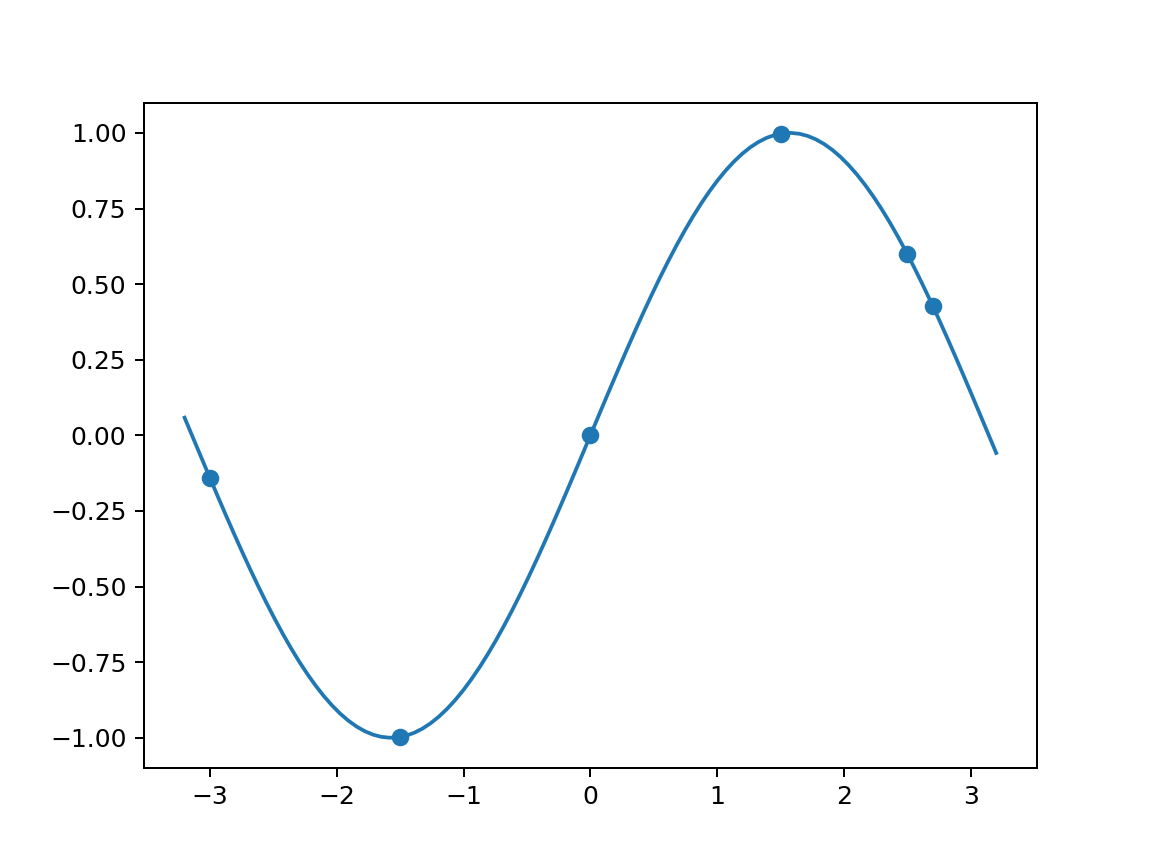

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x_train = np.array([-3, -1.5, 0, 1.5, 2.5, 2.7])
y_train = np.sin(x_train)

grids = np.linspace(-3.2, 3.2, 100)
fig = plt.figure()
plt.plot(grids, np.sin(grids))
plt.scatter(x_train, y_train)
fig.show()

In [2]:
from scipy.spatial.distance import cdist

def SE_kernel(x1, x2):
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    dx = cdist(x1, x2)
    return np.exp(-(dx ** 2) / 2)

<IPython.core.display.Javascript object>


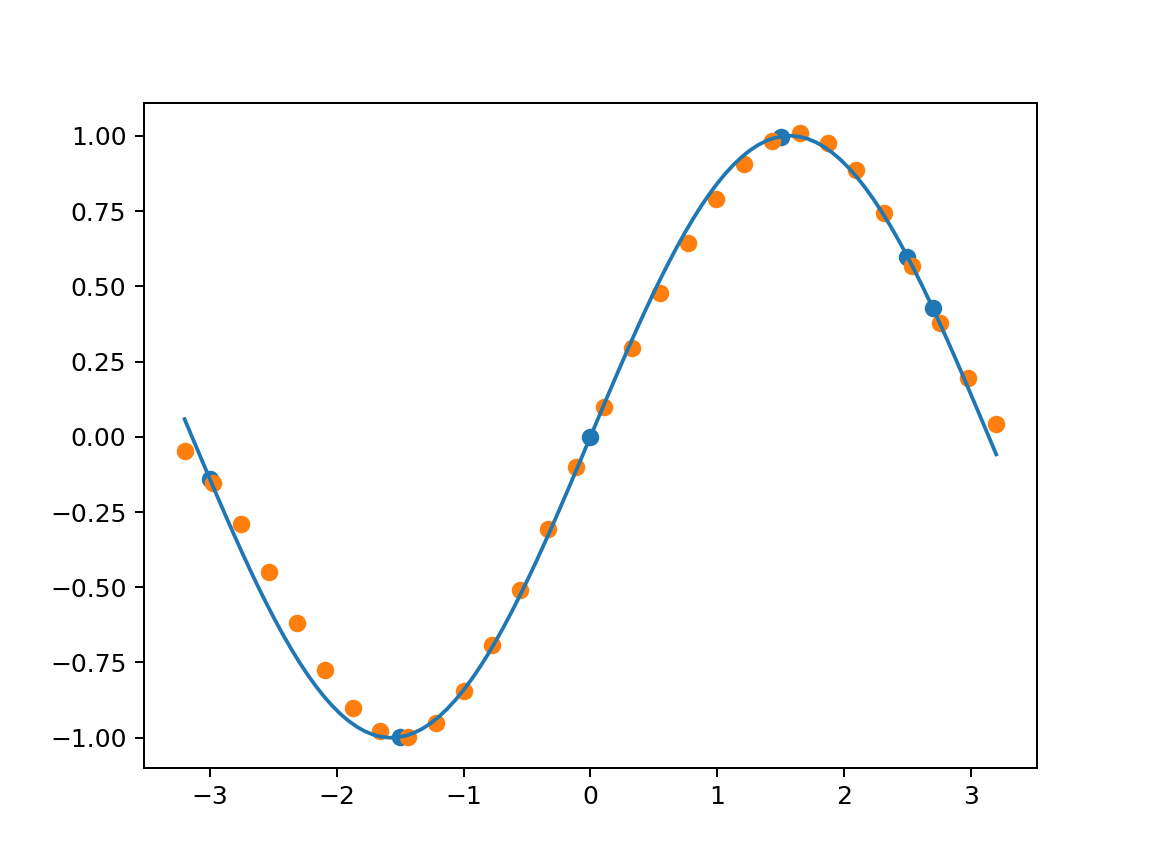

MSE = 0.002671251640256401


In [3]:
x_test = np.linspace(-3.2, 3.2, 30)
y_test = np.sin(x_test)

K = SE_kernel(x_train, x_train)
K_star = SE_kernel(x_test, x_train)
y_predict = K_star.dot(np.linalg.inv(K)).dot(y_train)

fig_2 = plt.figure()
plt.plot(grids, np.sin(grids))# blue line
plt.scatter(x_train, y_train) # blue dots
plt.scatter(x_test, y_predict) # orange dots
fig_2.show()

MSE = np.mean((y_predict-y_test)**2)
print(f'MSE = {MSE}')

<IPython.core.display.Javascript object>


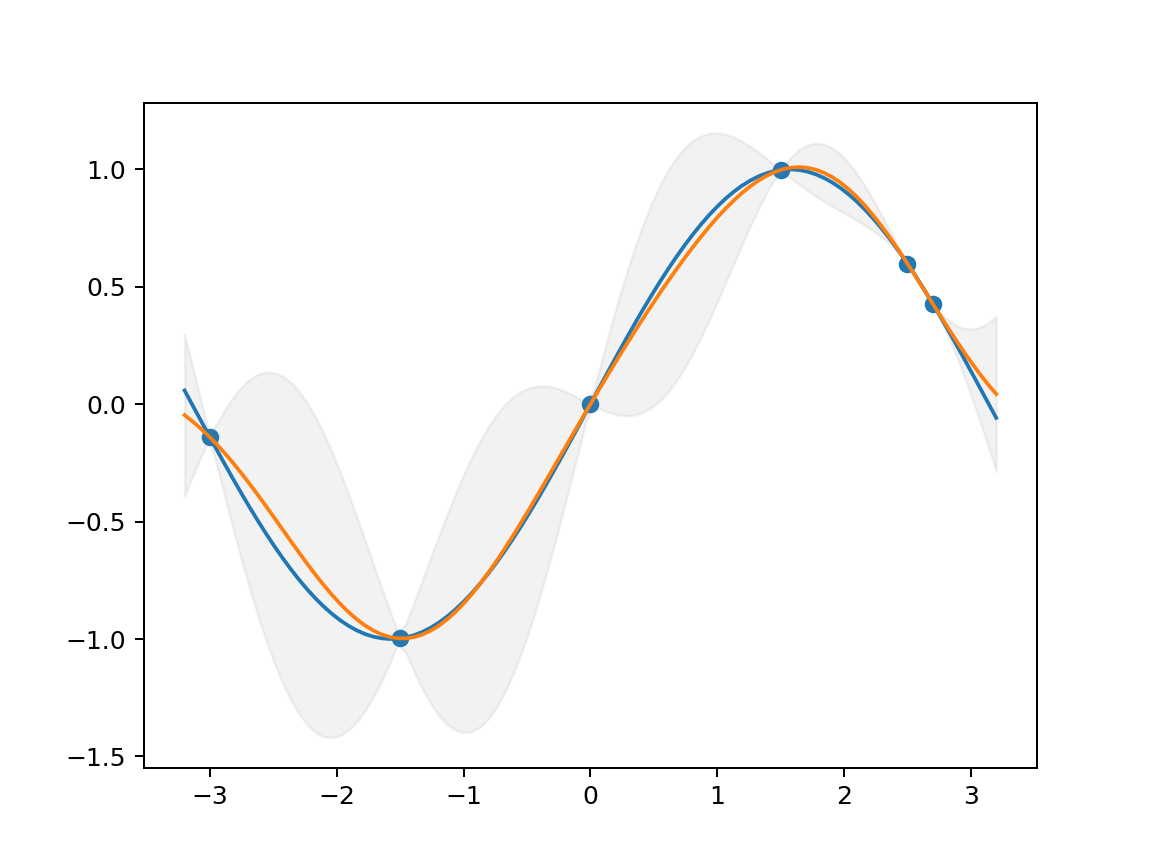

In [4]:
K = SE_kernel(x_train, x_train)
K_star = SE_kernel(grids, x_train)
K_star_2 = SE_kernel(grids, grids)
K_inv = np.linalg.inv(K)
y_predict = K_star.dot(K_inv).dot(y_train)

cov = K_star_2 - K_star.dot(K_inv).dot(K_star.T)
std = np.sqrt(cov.diagonal())

fig_2 = plt.figure()
plt.plot(grids, np.sin(grids)) 
plt.scatter(x_train, y_train)
plt.plot(grids, y_predict)
c = 1.96  # for 95% CI
plt.fill_between(
    grids, y_predict - c * std, y_predict + c * std, 
    color = 'gray', alpha = 0.1)
fig_2.show()

## Kernel choice

- Properties
    - Points closer in the input space are more strongly correlated
    $$
    \begin{aligned}
    \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert &< \left\Vert \mathbf{x} - \mathbf{x}^{\prime\prime} \right\Vert \\
    K(\mathbf{x}, \mathbf{x}^{\prime}) &> K(\mathbf{x}, \mathbf{x}^{\prime\prime})
    \end{aligned}
    $$
- Squared exponential kernel
- **Matérn kernel**
- Periodic kernel
- ...

### Squared exponential kernel 

$$
\begin{aligned}
K(\mathbf{x}, \mathbf{x}^{\prime}) = \alpha^2 \cdot \exp \left\{-\frac{\left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert^2}{\lambda}\right\}
\end{aligned}
$$

<center>
<figure>
<img align=center src="fig/SE.png" width="800" >
</figure>

- Amplitude $\alpha$ controls the overall amount of variability
    - The larger $\alpha$ is, the more quickly $f(x)$ changes with $x$

<center>
<figure>
<img align=center src="fig/SE-varying alpha.png" width="800" >
</figure>
</center>

- Length scale $\lambda$ controls the amount of smoothness
    - With a smaller value of $\lambda$
        - The function fits through all of the points exactly
        - The uncertainty away from evaluated points increases very quickly
    - With a larger value of $\lambda$
        - The curve becomes smoother but does not fit through all the points exactly
        - The uncertainty away from evaluated points increases more slowly

<center>
<figure>
<img align=center src="fig/SE-varying lambda.png" width="800" >
</figure>
</center>

### Matérn kernel

$$
\begin{aligned}
    K(\mathbf{x}, \mathbf{x}^{\prime}) = \alpha^2 \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2 \nu}\left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert\right)^{\nu} K_{\nu}\left(\sqrt{2 \nu}\left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert\right)
\end{aligned}
$$

- Relax the assumption in Squared Exponential that the function should be infinitely differentiable
- $\nu = 0.5$: Once differentiable 
$$
\begin{aligned}
    K \left[\mathbf{x}, \mathbf{x}^{\prime}\right] = \alpha^{2} \exp \left\{-\frac{\left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\lambda^2}\right\}
\end{aligned}
$$
- $\nu = 1.5$: Twice differentiable 
$$
\begin{aligned}
    K \left[\mathbf{x}, \mathbf{x}^{\prime}\right] = \alpha^{2}\left(1+\frac{\sqrt{3} \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\lambda}\right) \exp \left\{-\frac{\sqrt{3} \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\lambda}\right\}
\end{aligned}
$$
- $\nu = 2.5$: Three times differentiable 
$$
\begin{aligned}
    K \left[\mathbf{x}, \mathbf{x}^{\prime}\right] = \alpha^{2}\left(1+\frac{\sqrt{5} \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\lambda}+\frac{5  \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert^{2}}{3 \lambda^{2}}\right) \exp \left\{-\frac{\sqrt{5} \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\lambda}\right\}
\end{aligned}
$$

- $\nu = \infty$: Infinitely differentiable, identical to the squared exponential kernel

<center>
<figure>
<img align=center src="fig/matern.png" width="800" >
</figure>
</center>

### Periodic kernel

$$
\begin{aligned}
    K \left[\mathbf{x}, \mathbf{x}^{\prime}\right] = \alpha^{2} \cdot \exp \left\{ \frac{-2 \sin^2 \left(\frac{\pi \left\Vert \mathbf{x} - \mathbf{x}^{\prime} \right\Vert}{\tau}\right)} {\lambda^{2}} \right\}
\end{aligned}
$$

- Applicable to oscillatory function
- $\tau$: The period of the oscillation

<center>
<figure>
<img align=center src="fig/periodic.png" width="800" >
</figure>
</center>

## Noise involved

- Uncertainties cannot be alleviated even at the previously evaluated points
- Sampling twice at the same position or at very similar positions could be sensible

<center>
<figure>
<img align=center src="fig/noise.png" width="800" >
</figure>
</center>

## Using uncertainties in optimization

- Find the minimum

$$
\begin{aligned}
\mathbf{x}_* = \arg \min _{\mathbf{x} \in \mathcal{X}} f(\mathbf{x})
\end{aligned}
$$

- We can evaluate the objective pointwise, but do not have an easy functional form or gradients
- After preforming some evaluations, the $\mathcal{GP}$ shall give us easy closed-form marginal means and variances
- **Exploration:** Seek places with high variance
- **Exploitation:** Seek places with low mean
- The acquisition function shall balance between the exploration and exploitation for the surrogate model to determine where to sample next

## Expected improvement

$$
\begin{aligned}
    \mathrm{EI}(\mathbf{x}_*) &:= \mathbb{E} \left[ \left[f(\mathbf{x}_*)-f\left(\mathbf{x}^{\dagger}\right)\right]^{+}\right] \\
    &= \left\{
    \begin{array}{ll}
        \mathbb{E} \left[f(\mathbf{x}_*)-f\left(\mathbf{x}^{\dagger}\right)\right], & f(\mathbf{x}_*) > f\left(\mathbf{x}^{\dagger}\right) \\
        0, & f(\mathbf{x}_*) \le f\left(\mathbf{x}^{\dagger}\right)
    \end{array} \\
    \right.
\end{aligned}
$$

- $f(\mathbf{x}^{\dagger})$: The best sample so far

- Under $\mathcal{GP}$, the posterior distribution $f(\mathbf{x}_*)$ given $\big\{\left(\mathbf{x}_{i}, y_{i}\right) \big \vert i = 1, \ldots, N\big\}$ is normally distributed with mean $\overline{\mathbf{f}}_*$
and variance $\operatorname{cov} \left(\mathbf{f}_{*}\right)$
    - $\Phi$: The CDF of the standard normal distribution
    - $\phi$: The PDF of the standard normal distribution
    - $\xi$: The E&E trade-off parameter
        - Higher value of $\xi$ leads to more exploration
        - With increasing $\xi$ values, the importance of improvements predicted by the $\mathcal{GP}$ mean $\overline{\mathbf{f}}_*$ decreases relative to the importance of potential improvements in regions of high prediction uncertainty, represented by larger $\operatorname{cov} \left(\mathbf{f}_{*}\right)$ values 
        - Recommended default value is $0.01$
    
$$
\begin{aligned}
    \mathrm{EI}(\mathbf{x}_*) = 
    \left\{
    \begin{array}{ll}
        \left(\overline{\mathbf{f}}_* - f\left(\mathbf{x}^{\dagger}\right)-\xi\right) \Phi(\mathbf{Z}) + \operatorname{cov} \left(\mathbf{f}_{*}\right) \phi(\mathbf{Z}), & \operatorname{cov} \left(\mathbf{f}_{*}\right) > 0 \\
        0, & \operatorname{cov} \left(\mathbf{f}_{*}\right) = 0
    \end{array}
    \right.
\end{aligned}
$$

$$
\begin{aligned}
    \mathbf{Z} = \left\{
    \begin{array}{ll}
        \frac{\overline{\mathbf{f}}_* - f\left(\mathbf{x}^{\dagger}\right)-\xi}{\operatorname{cov} \left(\mathbf{f}_{*}\right)}, & \operatorname{cov} \left(\mathbf{f}_{*}\right) > 0 \\
        0, & \operatorname{cov} \left(\mathbf{f}_{*}\right) = 0
    \end{array}\right.
\end{aligned}
$$

<center>
<figure>
<img align=center src="fig/process-2.gif" width="400" >
</figure>
</center>

## Implementation

### With `Numpy` and `Scipy`

In [5]:
import numpy as np

bounds = np.array([[-1.0, 2.0]])
noise = 0.3

# though f has the following analytical form
# treat it as the black box
def f(X, noise = noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

# draw two samples from the noisy objective function
X_init = np.array([[-0.9], [1.1]])
Y_init = f(X_init)

<IPython.core.display.Javascript object>


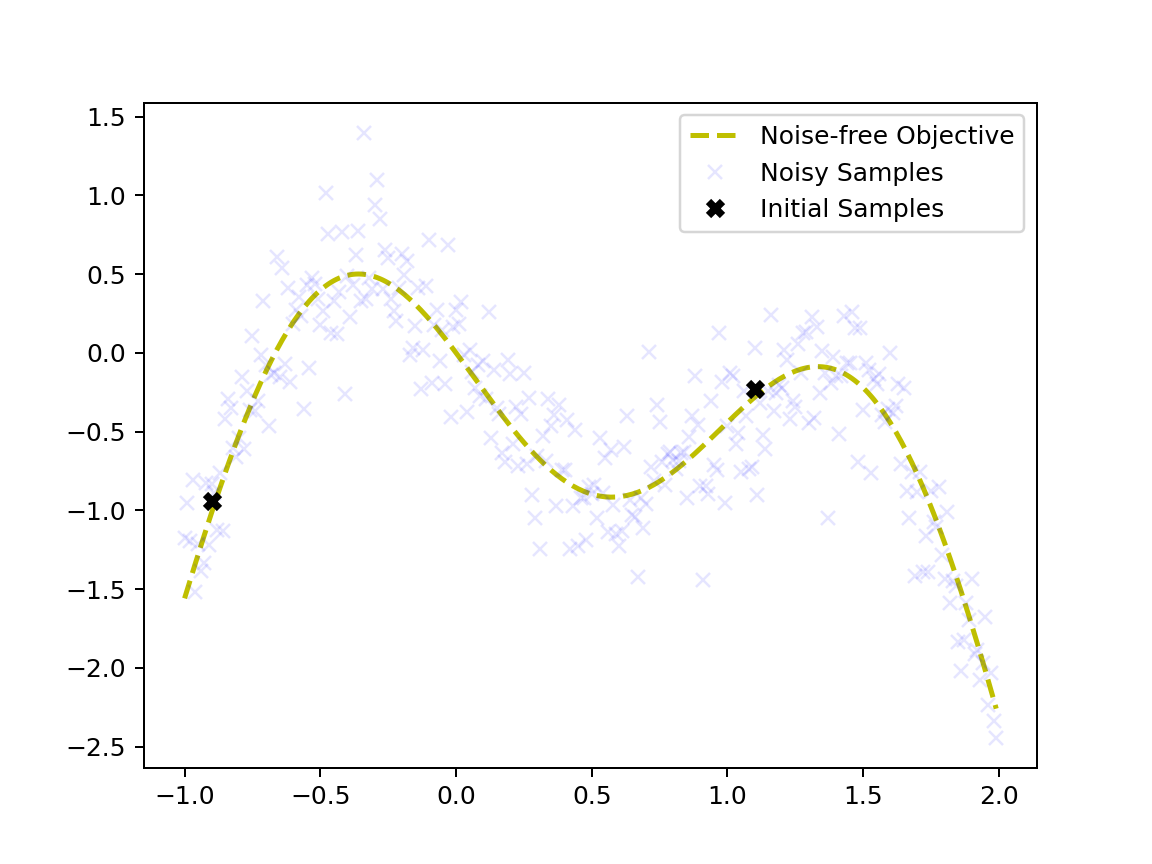

In [6]:
# dense grid of points within bounds [-1, 2. 0.1]
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)

# noise-free objective function values at X 
Y = f(X, 0)

# plot optimization objective with noise level 
fig = plt.figure()
plt.plot(X, Y, 'y--', lw = 2, label = 'Noise-free Objective')
plt.plot(X, f(X), 'bx', lw = 1, alpha = 0.1, label = 'Noisy Samples')
plt.plot(X_init, Y_init, 'kx', mew = 3, label = 'Initial Samples')
plt.legend()
fig.show()

In [7]:
from scipy.stats import norm

def expected_improvement(X, X_sample, Y_sample, gpr, xi = 0.01):
    '''
    Compute the EI at points X based on existing samples X_sample
    and Y_sample using a Gaussian process surrogate model.
    
    Args:
        X (m by d): Points at which EI shall be computed
        X_sample (n by d): Sample locations
        Y_sample (n by 1): Sample values
        gpr: A GaussianProcessRegressor fitted to samples
        xi: E&E trade-off parameter
    
    Returns:
        Expected improvements at points X
    '''
    
    mu, sigma = gpr.predict(X, return_std = True)
    mu_sample = gpr.predict(X_sample)
    sigma = sigma.reshape(-1, 1)
    mu_sample_opt = np.max(mu_sample)

    with np.errstate(divide = 'warn'):
        # xi determines the amount of exploration 
        # higher xi leads to more exploration
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        # the first term is exploitation, the second term is exploration
        # EI is positive if the value of new observation is greater than 
        # the previously evaluated point with the largest observed value
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        # EI is 0 otherwise
        ei[sigma == 0.0] = 0.0
    
    return ei

In [8]:
from scipy.optimize import minimize

def propose_location(acquisition, X_sample, Y_sample, gpr, bounds, n_restarts = 25):
    '''
    Proposes the next sampling point by optimizing the acquisition function.
    
    Args:
        acquisition: Acquisition function
        X_sample (n by d): Sample locations 
        Y_sample (n by 1): Sample values
        gpr: A GaussianProcessRegressor fitted to samples

    Returns:
        Location of the acquisition function maximum
    '''
    
    dim = X_sample.shape[1] # d
    min_val = 1 
    min_x = None
    
    def min_obj(X):
        # scipy only supports minimization
        # objective is the negative acquisition function
        return -acquisition(X.reshape(-1, dim), X_sample, Y_sample, gpr)
    
    # find the best optimum by starting from n_restart different random points.
    for x0 in np.random.uniform(bounds[:, 0], bounds[:, 1], size = (n_restarts, dim)):
        res = minimize(min_obj, x0 = x0, bounds = bounds, method = 'L-BFGS-B')        
        if res.fun < min_val:
            min_val = res.fun[0]
            min_x = res.x
            
    return min_x.reshape(-1, 1)

In [9]:
# some helper functions for visualization
def plot_approximation(gpr, X, Y, X_sample, Y_sample, X_next = None, show_legend = False):
    mu, std = gpr.predict(X, return_std = True)
    plt.fill_between(
        X.ravel(), 
        mu.ravel() + 1.96 * std, 
        mu.ravel() - 1.96 * std, alpha = 0.1) 
    plt.plot(X, Y, 'y--', lw = 1, label = 'Noise-free Objective')
    plt.plot(X, mu, 'b-', lw = 1, label = 'Surrogate Function')
    plt.plot(X_sample, Y_sample, 'kx', mew = 3, label = 'Noisy Samples')
    if X_next:
        plt.axvline(x = X_next, ls = '--', c = 'k', lw = 1)
    if show_legend:
        plt.legend()

def plot_acquisition(X, Y, X_next, show_legend = False):
    plt.plot(X, Y, 'r-', lw = 1, label = 'Acquisition Function')
    plt.axvline(
        x = X_next, ls = '--', c = 'k', lw = 1, label = 'Next Sampling Location')
    if show_legend:
        plt.legend()
        
def plot_convergence(X_sample, Y_sample, n_init = 2):
    fig = plt.figure(figsize = (10, 4))

    x = X_sample[n_init:].ravel()
    y = Y_sample[n_init:].ravel()
    r = range(1, len(x)+1)
    
    x_neighbor_dist = [np.abs(a-b) for a, b in zip(x, x[1:])]
    y_max_watermark = np.maximum.accumulate(y)
    
    plt.subplot(1, 2, 1)
    plt.plot(r[1:], x_neighbor_dist, 'bo-')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Distance Between Consecutive x\'s')

    plt.subplot(1, 2, 2)
    plt.plot(r, y_max_watermark, 'ro-')
    plt.xlabel('Iteration')
    plt.ylabel('Best Y')
    plt.title('Value of Best Selected Sample')
    fig.show()

<IPython.core.display.Javascript object>


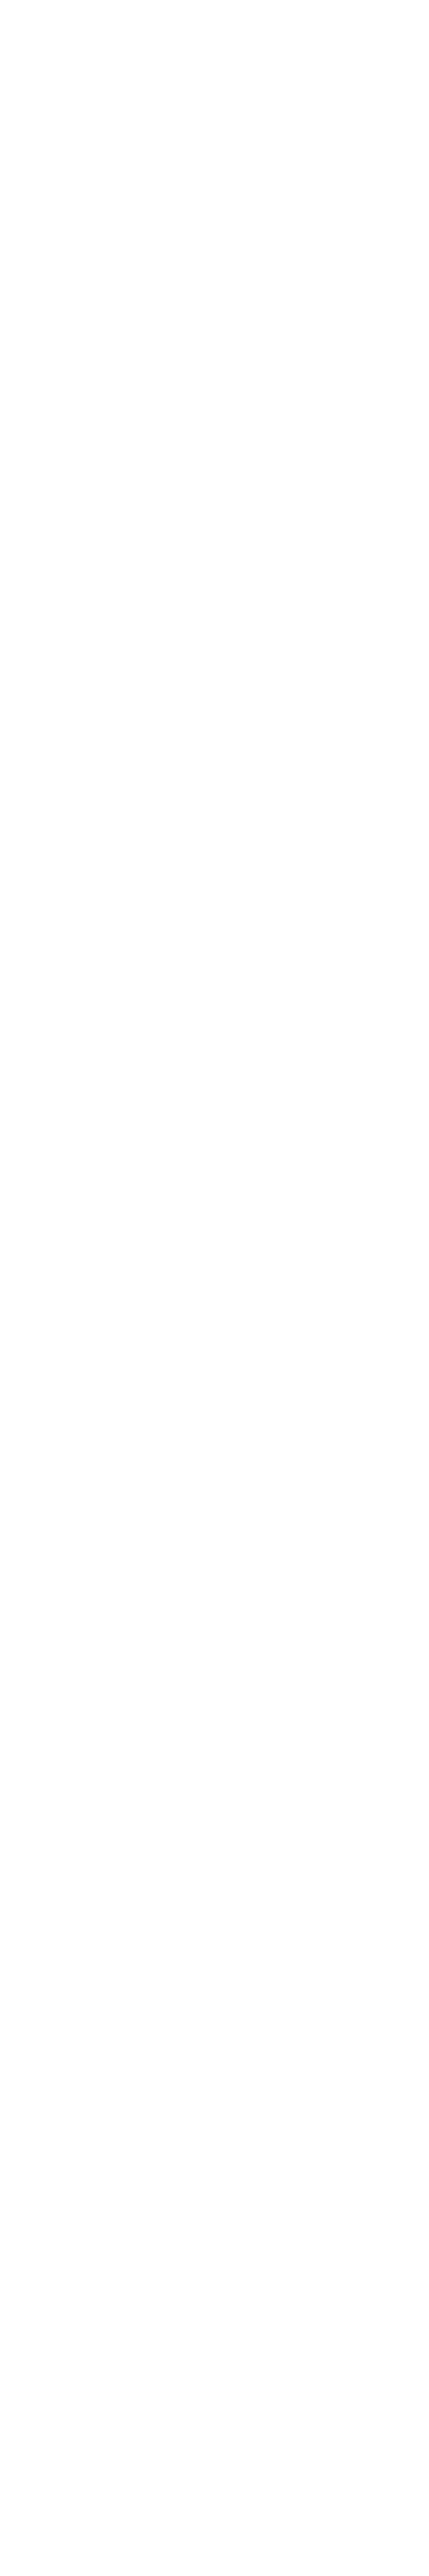

TypeError: 'float' object is not subscriptable

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

# Gaussian process with Matern kernel as surrogate model
# lambda = 1, nu = 2.5
m52 = ConstantKernel(1.0) * Matern(length_scale = 1.0, nu = 2.5)
# noisy version
gpr = GaussianProcessRegressor(kernel = m52, alpha = noise**2)

# initialize samples
X_sample = X_init
Y_sample = Y_init

# run 20 iterations
n_iter = 20

plt.figure(figsize = (10, n_iter*3), dpi = 100)
plt.subplots_adjust(hspace = 0.4)

for i in range(n_iter):
    # update Gaussian process with existing samples
    gpr.fit(X_sample, Y_sample)

    # decide the next sampling according to the acquisition function
    X_next = propose_location(expected_improvement, X_sample, Y_sample, gpr, bounds)
    
    # query the next noisy sample from the objective function
    Y_next = f(X_next, noise)
    
    # plot samples, surrogate function, noise-free objective and next sampling location
    fig = plt.subplot(n_iter, 2, 2*i+1)
    plot_approximation(gpr, X, Y, X_sample, Y_sample, X_next, show_legend = i==0)
    plt.title(f'Iteration {i+1}')

    plt.subplot(n_iter, 2, 2*i+2)
    plot_acquisition(X, expected_improvement(X, X_sample, Y_sample, gpr), X_next, show_legend = i==0)
    
    # add sample to previous samples
    X_sample = np.vstack((X_sample, X_next))
    Y_sample = np.vstack((Y_sample, Y_next))

plt.show()

- The two initial samples drive search into the direction of the local maximum on the right side
- Exploration allows the algorithm to escape from the local optimum 
- The global optimum on the left side was found
- During the process, sampling points often fall within regions of high uncertainty (exploration) rather than only driven by the highest surrogate function values (exploitation)

<IPython.core.display.Javascript object>


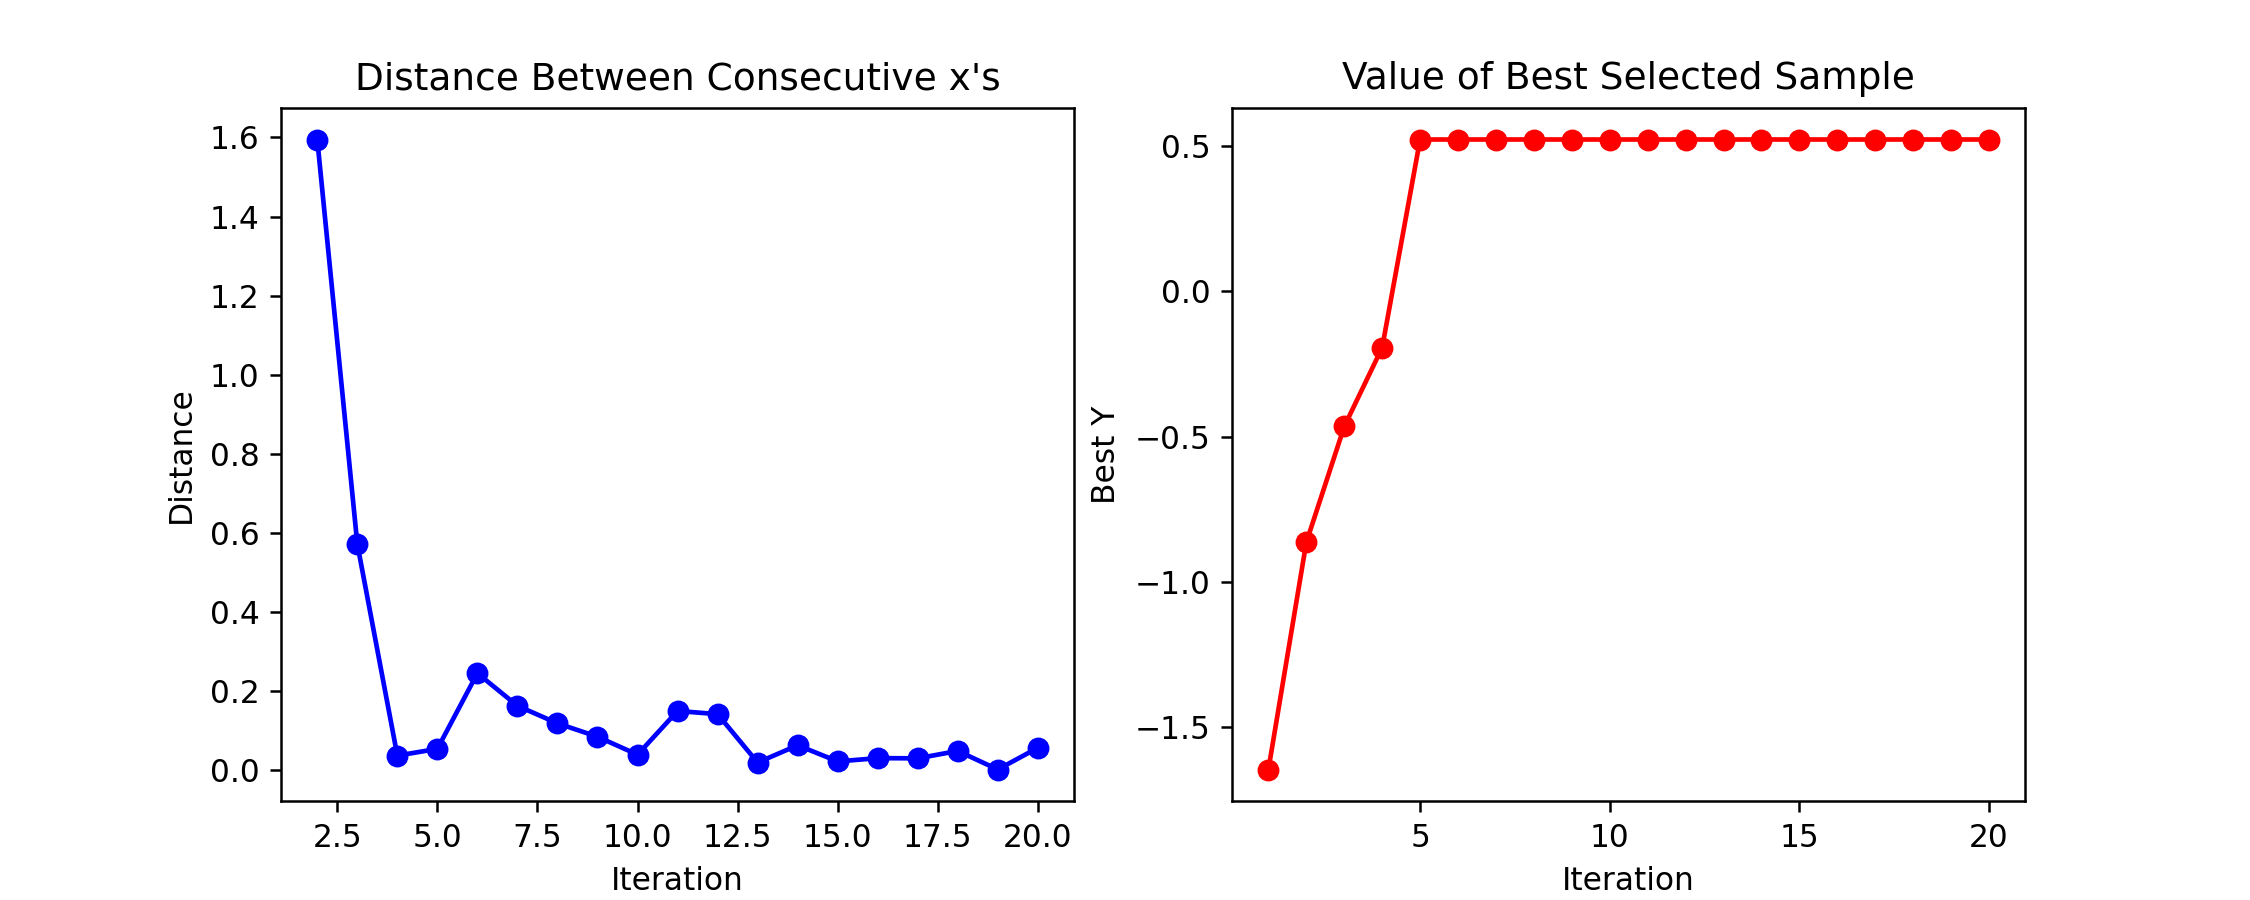

In [11]:
# the sampling points stay around the maximum
# small proposal differences between consecutive steps
plot_convergence(X_sample, Y_sample)

### Bayesian optimization libraries

- [`Scikit-optimize`](https://scikit-optimize.github.io/stable/)
    - A library for sequential model-based optimization
    - Based on [`scikit-learn`](https://scikit-learn.org/stable/)
    - Installation
    ```
        pip install scikit-optimize
    ```
- [`GPyOpt`](http://sheffieldml.github.io/GPyOpt/)
    - A library for Bayesian optimization
    - Based on [`GPy`](https://sheffieldml.github.io/GPy/)
    - Installation
    ```
        pip install GPy
        pip install GPyOpt
    ```

In [12]:
from sklearn.base import clone
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern

m52 = ConstantKernel(1.0) * Matern(length_scale = 1.0, nu = 2.5)
gpr = GaussianProcessRegressor(kernel = m52, alpha = noise**2)

r = gp_minimize(
    lambda x: -f(np.array(x))[0], # API is designed for minimization
    bounds.tolist(),              # optimization within given bounds
    base_estimator = gpr,
    acq_func = 'EI',              # expected improvement
    xi = 0.01,                    # E&E trade-off
    n_calls = 20,                 # number of iterations
    n_random_starts = 0,          # initial samples are provided
    x0 = X_init.tolist(),         # initial samples x
    y0 = -Y_init.ravel())         # initial samples y

# fit GP model to samples for plotting results
gpr.fit(r.x_iters, -r.func_vals)

GaussianProcessRegressor(alpha=0.09, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5),
                         n_restarts_optimizer=0, noise=None, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

<IPython.core.display.Javascript object>


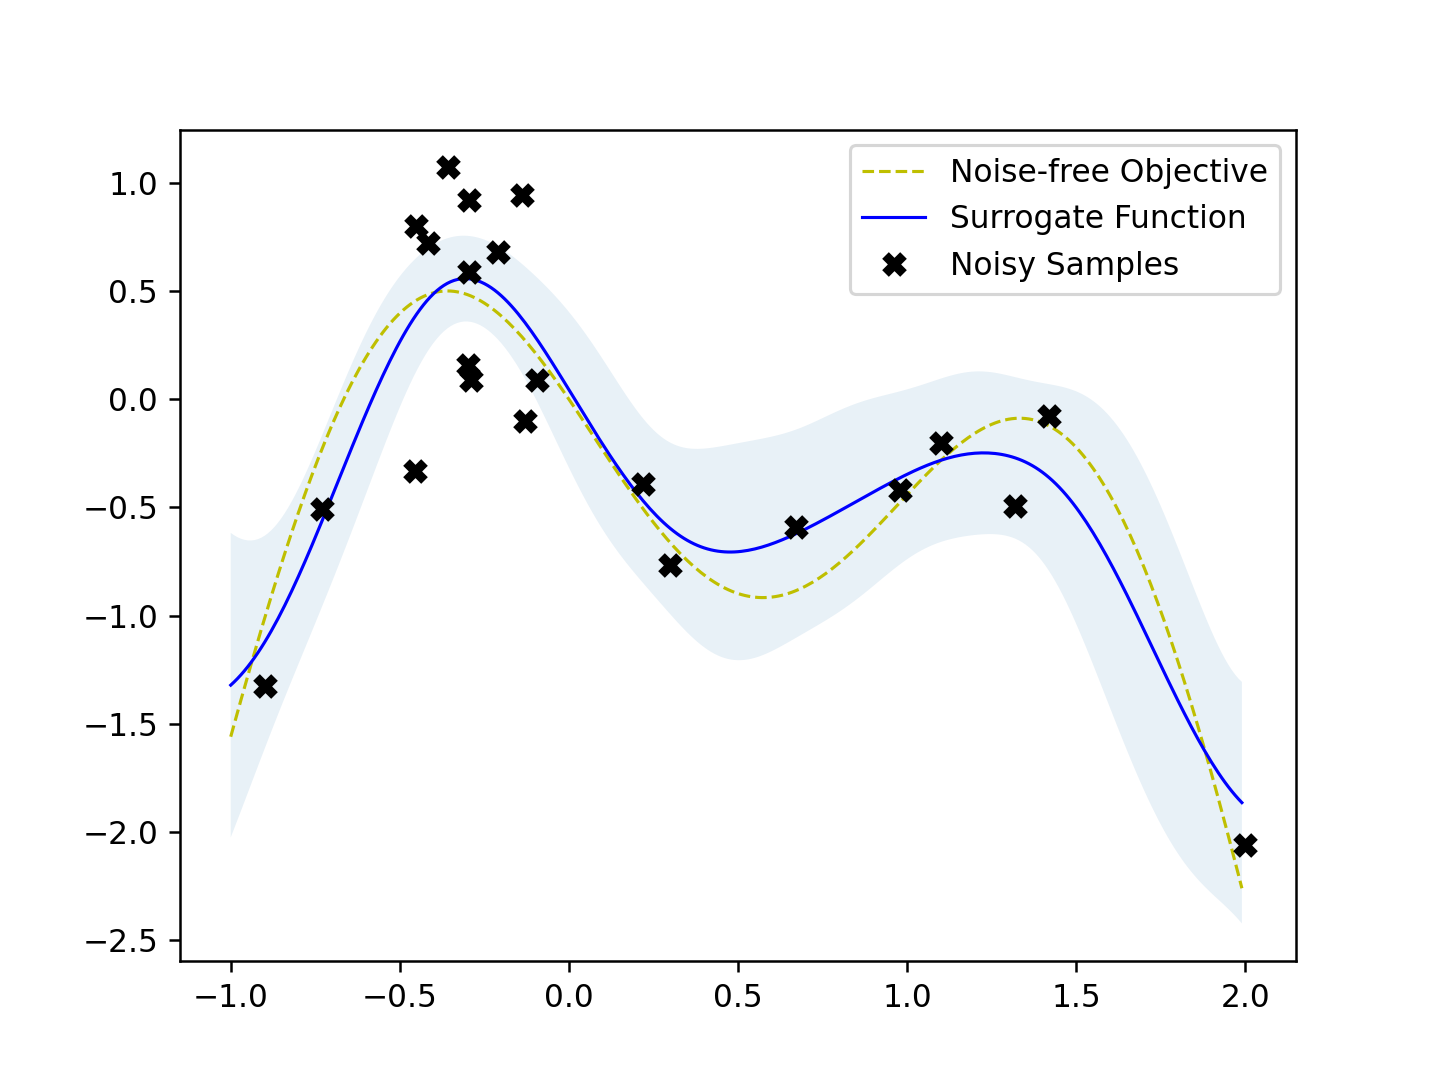

In [13]:
# plot the fitted model and the noisy samples
plt.figure()
plot_approximation(gpr, X, Y, r.x_iters, -r.func_vals, show_legend = True)

<IPython.core.display.Javascript object>


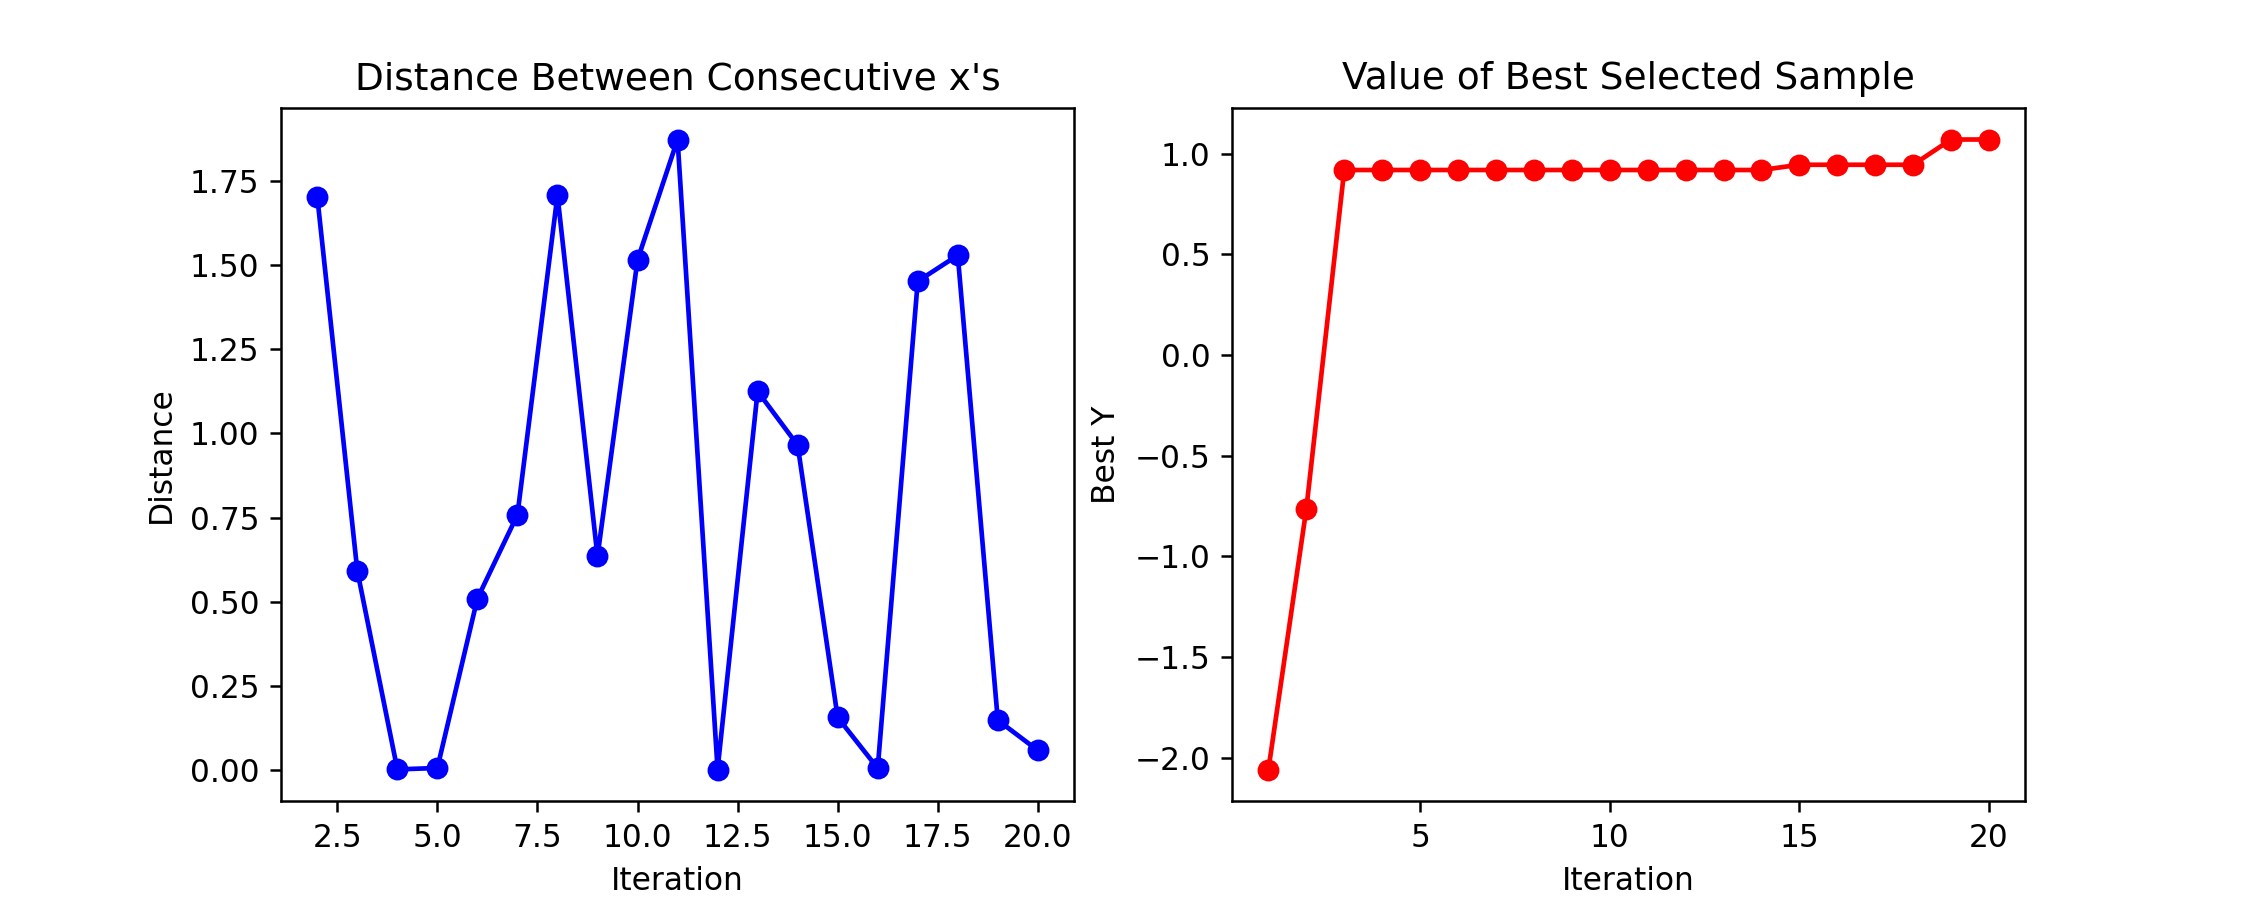

In [14]:
plot_convergence(np.array(r.x_iters), -r.func_vals)

### `GPyOpt`

In [16]:
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization

kernel = GPy.kern.Matern52(input_dim = 1, variance = 1.0, lengthscale = 1.0)
# list of dictionaries containing the descriptions of the inputs
bds = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]

optimizer = BayesianOptimization(
    f = f,                     # black-box function
    domain = bds,              # parameters domain
    model_type = 'GP',         # GP as surrogate model
    kernel = kernel,           # Matern kernel
    acquisition_type = 'EI',   # expected improvement
    acquisition_jitter = 0.01, # E&E trade-off
    X = X_init,                # initial samples x
    Y = -Y_init,               # initial samples y
    noise_var = noise**2,
    exact_feval = False,       # observations involve noise
    normalize_Y = False,
    maximize = True)

optimizer.run_optimization(max_iter = 20)

<IPython.core.display.Javascript object>


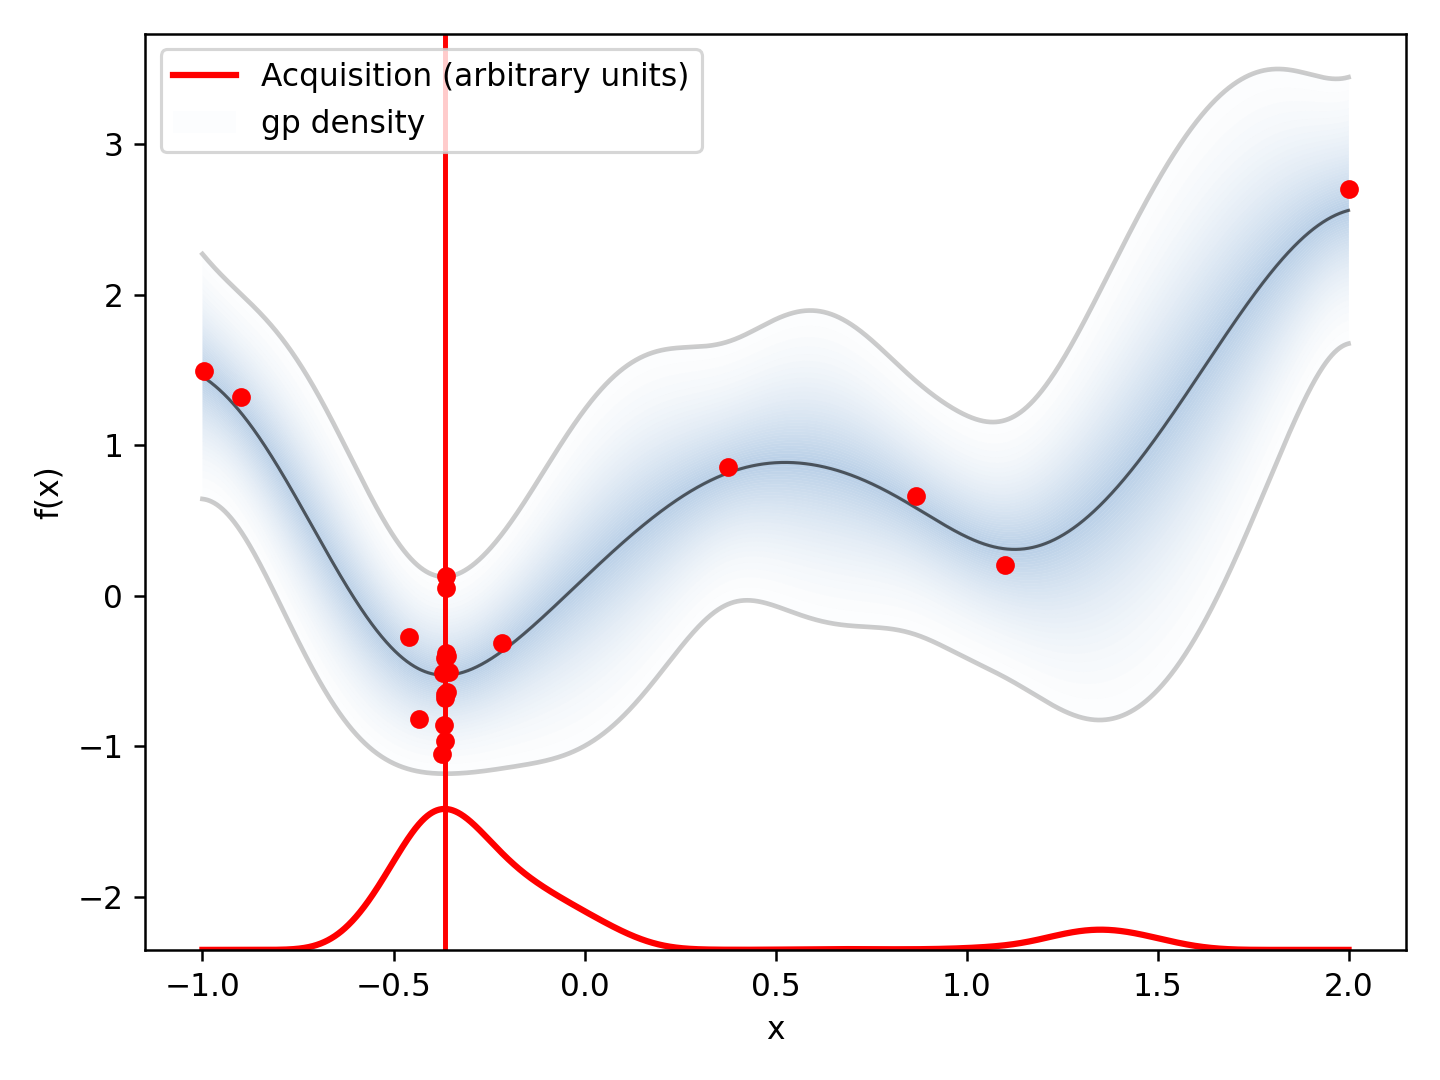

In [17]:
# built-in function
optimizer.plot_acquisition()

<IPython.core.display.Javascript object>


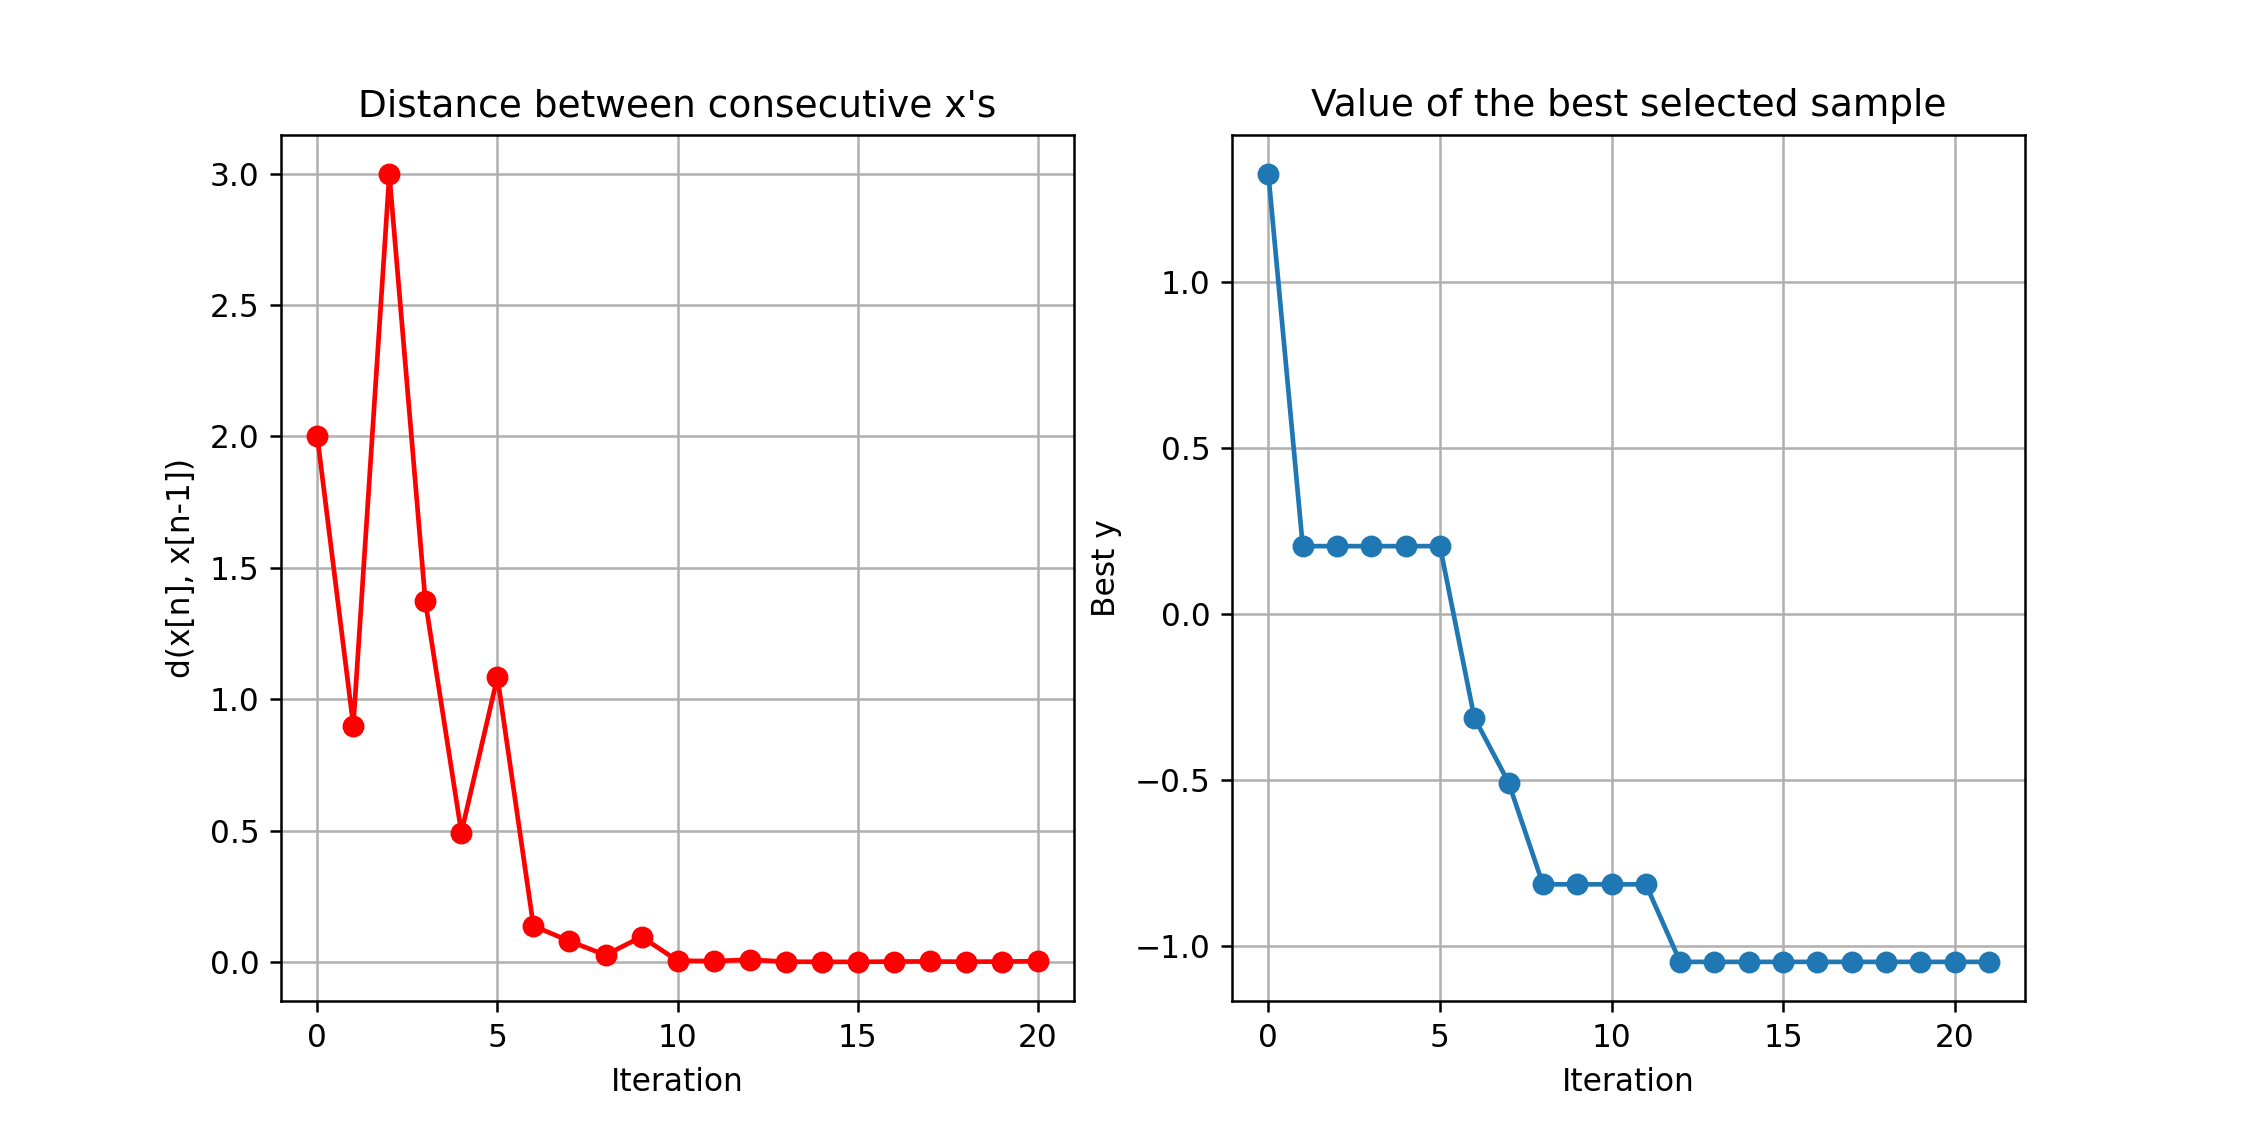

In [18]:
# built-in function
optimizer.plot_convergence()

## Application

In [19]:
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
from xgboost import XGBRegressor

# load the diabetes dataset (for regression)
X, Y = datasets.load_diabetes(return_X_y = True)

# instantiate an XGBRegressor with default hyperparameter settings
xgb = XGBRegressor(objective = 'reg:squarederror')

# compute a baseline to beat with hyperparameter optimization 
# average -MSE on the 5 validation sets
baseline = cross_val_score(xgb, X, Y, scoring = 'neg_mean_squared_error').mean()

In [20]:
# HPO with random search
# hyperparameters to tune
param_dist = {
    "learning_rate": uniform(0, 1),
    "gamma": uniform(0, 5),
    "max_depth": range(1, 50),
    "n_estimators": range(1, 300),
    "min_child_weight": range(1, 10)}

rs = RandomizedSearchCV(
    xgb, param_distributions = param_dist, 
    scoring = 'neg_mean_squared_error', n_iter = 25)

# run random search for 25 iterations
rs.fit(X, Y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, r...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000013939B7FEE0>,
                                        'learning_rate': <scipy

In [21]:
bds = [
    {'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
    {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
    {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
    {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
    {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}]

# optimization objective 
def cv_score(parameters):
    parameters = parameters[0]
    score = cross_val_score(
        XGBRegressor(
            objective = 'reg:squarederror',
            learning_rate = parameters[0],
            gamma = int(parameters[1]),
            max_depth = int(parameters[2]),
            n_estimators = int(parameters[3]),
            min_child_weight = parameters[4]), 
            X, Y, scoring = 'neg_mean_squared_error').mean()
    score = np.array(score)
    return score

# by default, initial_design_numdata = 5
optimizer = BayesianOptimization(
    f = cv_score, 
    domain = bds,
    model_type = 'GP',
    acquisition_type = 'EI',
    acquisition_jitter = 0.05,
    exact_feval = True, 
    maximize = True)

# only 20 iterations + 5 initial random points
optimizer.run_optimization(max_iter = 20)

In [22]:
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

print(f'Baseline neg. MSE = {baseline:.2f}')
print(f'Random search neg. MSE = {y_rs[-1]:.2f}')
print(f'Bayesian optimization neg. MSE = {y_bo[-1]:.2f}')

Baseline neg. MSE = -3437.07
Random search neg. MSE = -3875.35
Bayesian optimization neg. MSE = -3714.37


<IPython.core.display.Javascript object>


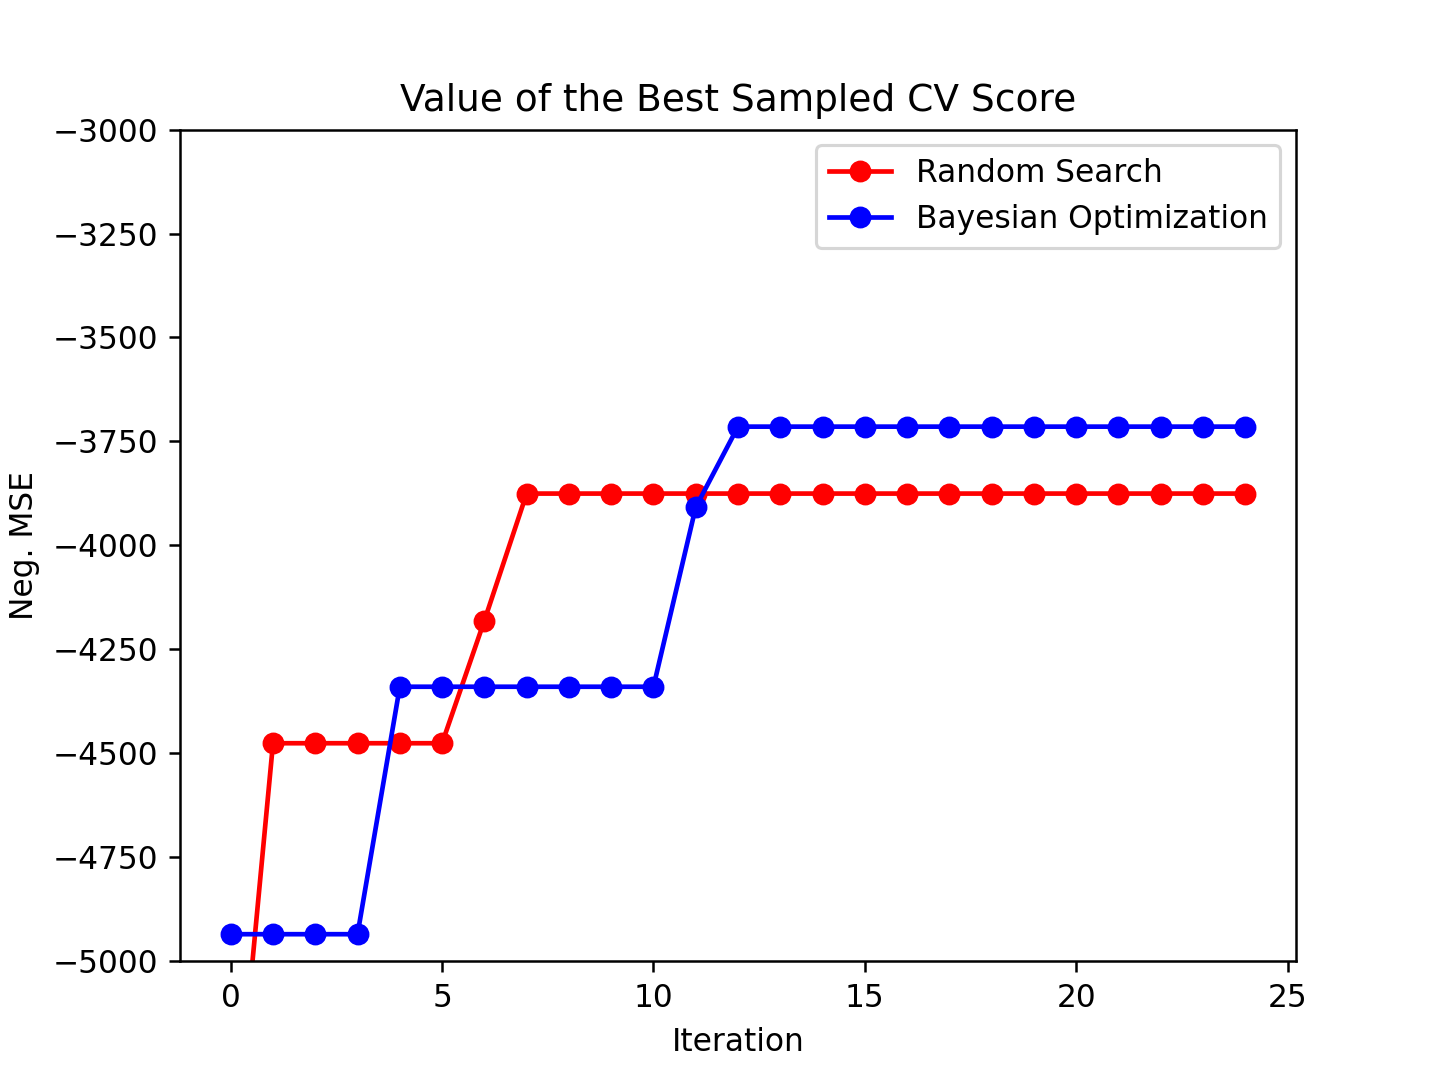

In [23]:
fig = plt.figure()
plt.plot(y_rs, 'ro-', label = 'Random Search')
plt.plot(y_bo, 'bo-', label = 'Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Neg. MSE')
plt.ylim(-5000, -3000)
plt.title('Value of the Best Sampled CV Score')
plt.legend()

## A/B testing in Facebook

- [Constrained Bayesian Optimization with Noisy Experiments](https://doi.org/10.1214/18-BA1110)

<center>
<figure>
<img align=center src="fig/ab-test.jpg" width="600" >
</figure>
</center>

- Experiment 1: Optimize 6 parameters of one of Facebook's ranking systems

<center>
<figure>
<img align=center src="fig/experiment-1.png" width="800" >
</figure>
</center>

- Experiment 2: Optimize 7 numeric compiler flags related to CPU usage used in their HipHop Virtual Machine(HHVM)

<center>
<figure>
<img align=center src="fig/experiment-2.png" width="800" >
</figure>
</center>